In [1]:
#PARTE 1 - ENTRADA EN CALOR

#Análisis exploratorio

#Exploración Inicial
#Realizar una descripción del dataset elegido detallando:
#● Nombres y tipos de las columnas, y descripción de cada una.
#● Resumen del dataset mostrando un conjunto reducido de filas (las primeras y las
#últimas)
#● Cantidad de valores nulos por columna

#Variables cualitativas
#● Sobre las variables de este tipo mostrar los distintos valores existentes y la cantidad de
#filas correspondientes a cada uno.
#○ Armar un nuevo dataframe con estos datos.
#● Para cada variable compare en un gráfico de barras la cantidad de filas pertenecientes
#a cada valor.
#○ ¿Es posible realizar este gráfico con un histograma? Explique las diferencias
#entre estos dos tipos de gráficos.

#Variables cuantitativas
#1) Sobre variables de este tipo calcular las siguientes medidas de resumen, y armar un
#nuevo dataframe con estos datos:
#● Media
#● Mediana
#● Moda
#● Primer y tercer cuartil
#● Rango
#2) Correlación de atributos
#● Explorar las variables tomándolas de a pares utilizando un gráfico scatter_matrix
#● Calcular la correlación de Pearson y graficar las correlaciones obtenidas en un
#gráfico de tipo heatmap

#3) Seleccionar un subconjunto de variables que resulten de interés y analizarlas utilizando:
#● Histogramas
#● Gráfico de violín (utilizar la librería matplotlib.pylot)
#● Boxplots
#● Density plot. Analizar si los datos presentan algún tipo de asimetría y explicar
#cuál.
#● Gráfico a elección. Seleccionar otro tipo de gráfico de una librería distinta a las
#propuestas en la materia y realizar un análisis a elección.

#Conclusiones
#Extraer conclusiones a partir de los análisis realizados en los puntos anteriores, y justificar cada
#conclusión.
#Por ejemplo:
#¿Se encontró algún tipo de comportamiento particular en alguna variable?
#¿Existen variables correlacionadas y por qué? ¿Es esperable o no?

In [2]:
#PARTE 2 - PREGUNTAS DE INVESTIGACION

#Luego de la entrada en calor les proponemos trabajar con un nuevo set de datos (disponible
#para descargar en el siguiente link ) y les planteamos los siguientes objetivos:
#1.- Explorar el set de datos de forma libre aplicando las técnicas que consideren adecuadas
#(vistas en la materia)
#2.- A partir de la exploración realizada plantear dos preguntas de investigación que les resulten
#interesantes para formular sobre los datos propuestos. Por ejemplo, ¿existe alguna relación
#entre el género musical y alguna de las otras variables?
#3.- Elegir dos visualizaciones (como mínimo) que permitan abordar sus preguntas de
#investigación e interpretar los resultados.

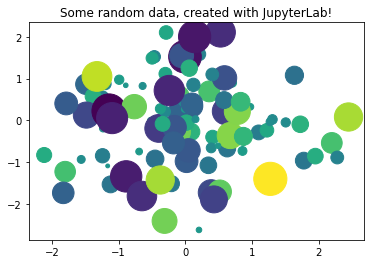

In [3]:
from matplotlib import pyplot as plt
import numpy as np

# Generate 100 random data points along 3 dimensions
x, y, scale = np.random.randn(3, 100)
fig, ax = plt.subplots()

# Map each onto a scatterplot we'll create with Matplotlib
ax.scatter(x=x, y=y, c=scale, s=np.abs(scale)*500)
ax.set(title="Some random data, created with JupyterLab!")
plt.show()

## Ejemplo de estilos aplicables al Markdown de jupyter

[Link](https://jupyter.org/try-jupyter/lab/)

## Ejemplos de informes hechos en jupyter por la Universidad de Oslo

[Link](https://uio-ccse.github.io/computational-essay-showroom/examples.html)

# Trabajo Práctico 1 : Visualización de datos

## Analisis del dataset 'endorsements' con informacion acerca del respaldo politico a candidatos a presidente de los Estados Unidos desde 1980 al 2012

### Introduccion

(explicar brevemente como funciona el respaldo politico en el marco de las elecciones presidenciales de estados unidos y de ser posible relacionarlo con las elecciones primarias, quizas agregar como va a estar estructurado el informe y los pasos a seguir en el analisis)


### Que es el respaldo politico?

(aca si dar un poco mas de info sobre el respaldo politico intentando relacionar las columnas del dataset con la explicacion)

### Análisis exploratorio

Cargamos el dataset 'endorsements-june-30' del input FiveThirtyEight para su analisis

In [4]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from subprocess import check_output
import zipfile

Dataset = "endorsements-june-30"

with zipfile.ZipFile("../input/fivethirtyeight/data/"+Dataset+".zip","r") as z:
    z.extractall(".")
    
data = pd.read_csv(Dataset+"/endorsements-june-30.csv")

#### Exploración inicial

Este es un set de datos de las elecciones que se llevaron a cabo en Estados Unidos desde 1980 hasta 2012 inclusive, a continuación se detallan las variables de los datos junto a sus tipos y una breve descripción. 

| Nombre                               | Tipo de variable      | Descripción                                                               |
|--------------------------------------|-----------------------|---------------------------------------------------------------------------|
| **Year**                             | Cuantitativa discreta | Indica el año electivo, va desde 1980 hasta 2012 con intervalos de 4 años |
| **Party**                            | Cualitativa binaria   | Indica si pertenece al partido Republicano o Democrático                  |
| **Candidate**                        | Cualitativa nominal   | Indica el nombre del candidato                                            |
| **Endorsement points**               | Cuantitativa discreta | Indica la cantidad de puntos de apoyo en el colegio electoral             |
| **Percentage of endorsement points** | Cuantitativa continua | Indica el porcentaje de puntos de apoyo por partido politico en el colegio electoral           |
| **Money raised**                     | Cuantitativa continua | Indica el dinero recaudado para la campaña electoral                      |
| **Percentage of money**              | Cuantitativa continua | Indica el porcentaje del dinero recaudado para la campaña electoral       |
| **Primary vote percentage**          | Cuantitativa continua | Indica el porcentaje de votos en las elecciones primarias                 |
| **Won primary**                      | Cualitativa binaria   | Indica si ganó en elecciones primarias                                    |

Aquí se muestran las primeras y últimas 5 filas del set (el cual tiene un total de 109 filas).

In [5]:
data.loc[:]

,year,party,candidate,endorsement_points,percentage_endorsement_points,money_raised,percentage_of_money,primary_vote_percentage,won_primary
0,1980,Republican,George H.W. Bush,5,6.32911,1475332.00,16.83,23.81,No
1,1980,Republican,Lowell Weicker,0,0.00000,60000.00,0.68,0.00,No
2,1980,Republican,Phil Crane,0,0.00000,2500000.00,28.53,0.76,No
3,1980,Republican,John Connally,6,7.59494,2200000.00,25.10,0.64,No
4,1980,Republican,Bob Dole,0,0.00000,253286.00,2.89,0.06,No
...,...,...,...,...,...,...,...,...,...
104,2012,Republican,Ron Paul,6,9.09091,4514165.68,14.13,10.89,No
105,2012,Republican,Mitt Romney,42,63.63640,18195222.87,56.95,52.17,Yes
106,2012,Republican,Michele Bachmann,0,0.00000,4288335.65,13.42,0.21,No
107,2012,Republican,Rick Perry,0,0.00000,0.00,0.00,0.28,No


Se puede ver que no hay valores nulos en ninguna columna.

In [6]:
data.isna().sum()

year                             0
party                            0
candidate                        0
endorsement_points               0
percentage_endorsement_points    0
money_raised                     0
percentage_of_money              0
primary_vote_percentage          0
won_primary                      0
dtype: int64

#### Variables cualitativas

A continuacion se detallan las variables cualitativas que aparecen en el dataset


| Nombre                               | Tipo de variable      |
|--------------------------------------|-----------------------|
| **Partido politico**                            | Cualitativa binaria   |
| **Candidato**                        | Cualitativa nominal   |
| **Gano elecciones primarias**                      | Cualitativa binaria   |


Junto con los valores existentes y la cantidad de filas en las que aparecen cada uno

In [7]:
cant_partidos_a = data[['party']].groupby(['party'])['party'].count().reset_index(name='count').sort_values(by=['count'], ascending=False)
cant_partidos_b = pd.DataFrame({'variable': ['party'] * len(cant_partidos_a)})
cant_partidos = pd.concat([cant_partidos_b, cant_partidos_a], axis=1)
cant_partidos.columns = ['Variable', 'Valor', 'Cantidad']

cant_candidatos_a = data[['candidate']].groupby(['candidate'])['candidate'].count().reset_index(name='count').sort_values(by=['count'], ascending=False)
cant_candidatos_b = pd.DataFrame({'variable': ['candidate'] * len(cant_candidatos_a)})
cant_candidatos = pd.concat([cant_candidatos_b, cant_candidatos_a], axis=1)
cant_candidatos.columns = ['Variable', 'Valor', 'Cantidad']

cant_primarias_a = data[['won_primary']].groupby(['won_primary'])['won_primary'].count().reset_index(name='count')
cant_primarias_b = pd.DataFrame({'variable': ['won_primary'] * len(cant_primarias_a)})
cant_primarias = pd.concat([cant_primarias_b, cant_primarias_a], axis=1)
cant_primarias.columns = ['Variable', 'Valor', 'Cantidad']

cant_cualitativas = pd.concat([cant_primarias, cant_partidos, cant_candidatos])
cant_cualitativas

,Variable,Valor,Cantidad
0,won_primary,No,97
1,won_primary,Yes,12
0,party,Democratic,48
1,party,Republican,61
0,candidate,Al Gore,2
...,...,...,...
85,candidate,Tom Tancredo,1
86,candidate,Tom Vilsack,1
87,candidate,Tommy Thompson,1
88,candidate,Walter Mondale,1


In [8]:
def simple_barplot(df, x, y, label):
    plt.figure(dpi=150)
    sns.set_style("darkgrid")
    ax = sns.barplot(x=x, y=y, data=df ,alpha=0.5, orient='v')
    ax.set_title(label)
    ax.set_xlabel(x)
    ax.set_ylabel('Cantidad')
    if len(df) > 5:
        plt.xticks(rotation=90)
    plt.show()

### Partido político (party)

In [9]:
data_partidos = data[['party']].groupby(['party'])['party'].count().reset_index(name='count').sort_values(by=['count'], ascending=False)
data_partidos.columns = ['Partido politico', 'Cantidad de registros']
data_partidos

,Partido politico,Cantidad de registros
1,Republican,61
0,Democratic,48


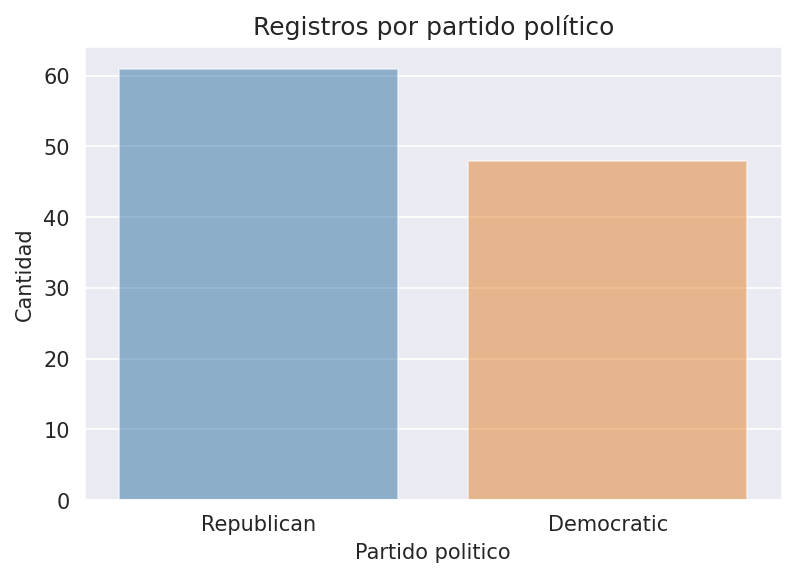

In [10]:
simple_barplot(data_partidos, 'Partido politico', 'Cantidad de registros', "Registros por partido político")

### Candidato (candidate)

In [11]:
data_candidatos = data[['candidate']].groupby(['candidate'])['candidate'].count().reset_index(name='count').sort_values(by=['count'], ascending=False)
data_candidatos.columns = ['Candidato', 'Cantidad de registros']
data_candidatos

,Candidato,Cantidad de registros
3,Alan Keyes,3
10,Bob Dole,3
0,Al Gore,2
79,Ron Paul,2
31,Gary Hart,2
...,...,...
30,Gary Bauer,1
29,Fred Thompson,1
28,Eugene McCarthy,1
27,Ernest Hollings,1


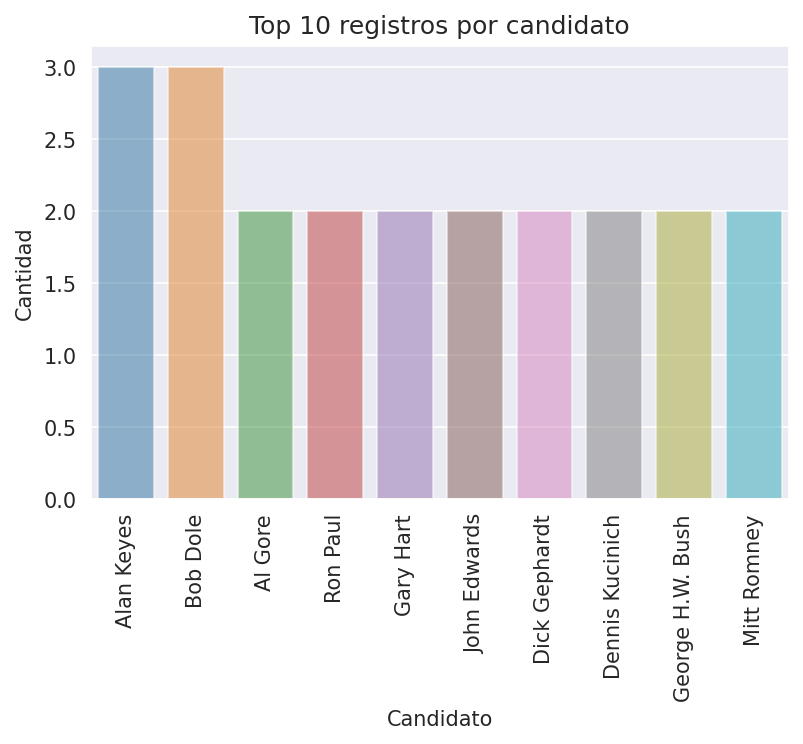

In [12]:
simple_barplot(data_candidatos.head(10), 'Candidato', 'Cantidad de registros', "Top 10 registros por candidato")

### Ganó elecciones primarias (won_primary)

In [13]:
data_primarias = data[['won_primary']].groupby(['won_primary'])['won_primary'].count().reset_index(name='count')
data_primarias.columns = ['Gano elecciones primarias', 'Cantidad de registros']
data_primarias

,Gano elecciones primarias,Cantidad de registros
0,No,97
1,Yes,12


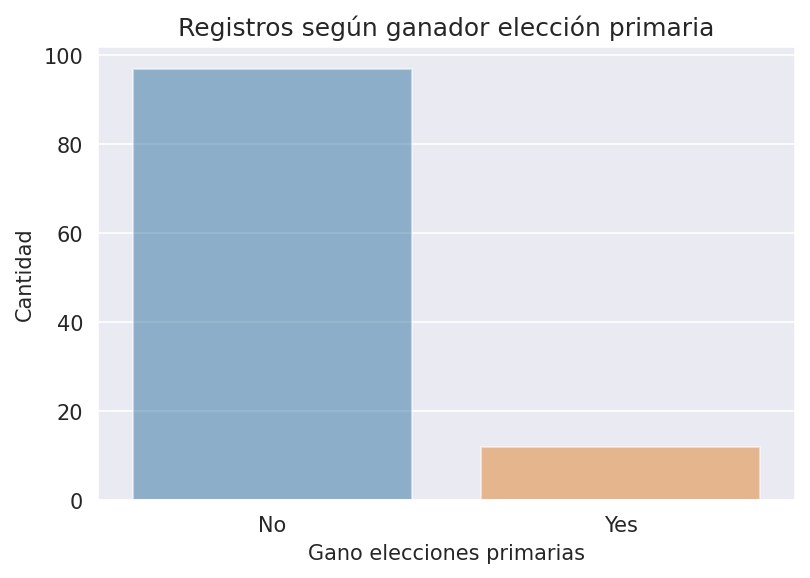

In [14]:
simple_barplot(data_primarias, 'Gano elecciones primarias', 'Cantidad de registros', "Registros según ganador elección primaria")

Estos gráficos no tendría sentido compararlos mediante un histograma. El histograma nos sirve cuando el soporte es continuo (es decir cuando la variable que queremos ver su distribución es continua) y en este caso estamos comparando cantidades de variables cualitativas/categóricas. Al estar comparando variables categóricas, cada "barrita" o columna del gráfico de barra representa un grupo definido por la categoría.

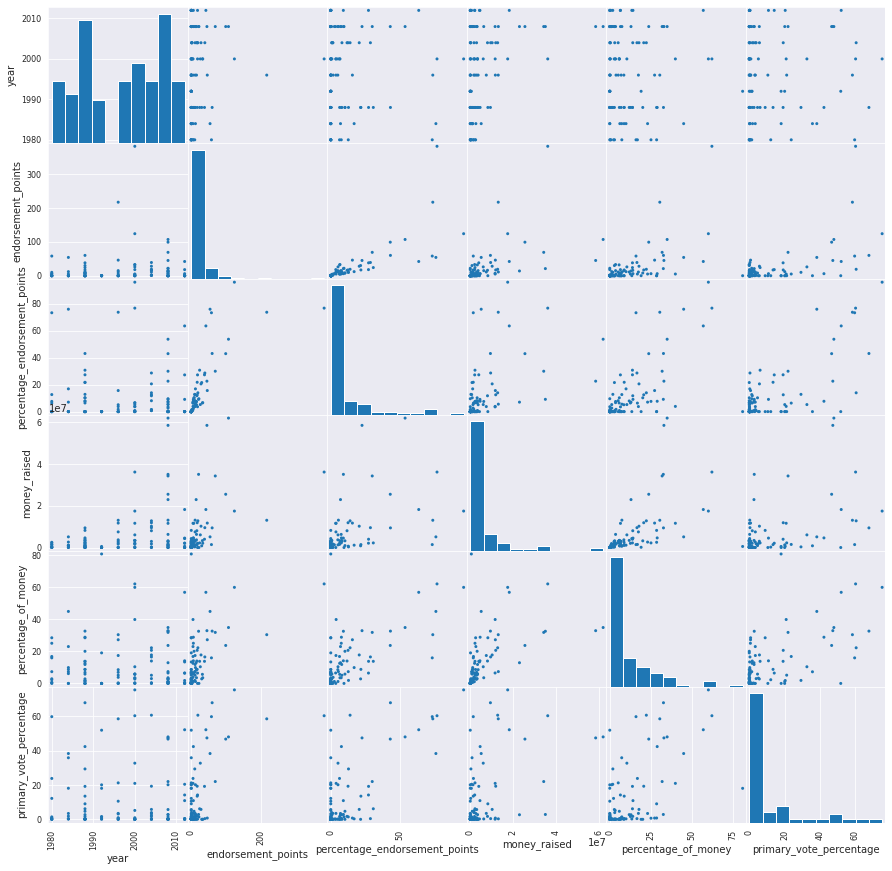

In [15]:
from pandas.plotting import scatter_matrix

scatter_matrix(data, alpha=1, figsize = (15,15));

In [16]:
data.corr(method ='pearson')

,year,endorsement_points,percentage_endorsement_points,money_raised,percentage_of_money,primary_vote_percentage
year,1.000000,0.081681,0.008928,0.309190,-0.017874,-0.013495
endorsement_points,0.081681,1.000000,0.769653,0.556855,0.560714,0.602708
percentage_endorsement_points,0.008928,0.769653,1.000000,0.506513,0.655406,0.746371
money_raised,0.309190,0.556855,0.506513,1.000000,0.567875,0.490024
percentage_of_money,-0.017874,0.560714,0.655406,0.567875,1.000000,0.605588
primary_vote_percentage,-0.013495,0.602708,0.746371,0.490024,0.605588,1.000000


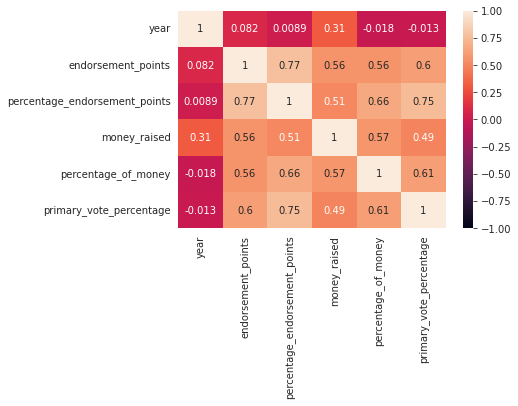

In [17]:
import matplotlib.pyplot as plt
heatmap = sns.heatmap(data.corr(), vmin=-1, vmax=1, annot=True)

#### Referencias

[Generador de citas](https://www.mybib.com/)
(usar APA7 para las referencias)

[Endorsing candidates. (n.d.). FEC.gov; Federal Election Commission](https://www.fec.gov/help-candidates-and-committees/making-disbursements-ssf-or-connected-organization/endorsing-candidates-corporation-labor-organization/)